<a href="https://colab.research.google.com/github/Orochi0519/ML/blob/Class-notes/Hands_On_Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la inferencia



En la lección anterior conocimos las métricas estadísticas comúnmente empleadas para determinar variabilidad y relación entre variables.
En esta lección, nos enfocaremos en aquellas que podemos emplear sobre distribuciones y cómo probar hipótesis.



```
# Esto tiene formato de código
```

## Cargando nuestros módulos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
import scipy.stats as stats
import scipy.stats.distributions as dist
import statsmodels.api as sm
from collections import Counter


## Intervalos de confianza

In [ ]:
data1 = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]
data2 = [12, 13, 13, 14, 15, 16, 19, 22, 23, 24, 27, 27, 28, 29, 29]
len(data1)

15

### Intervalos de confianza utilizando la distribución t



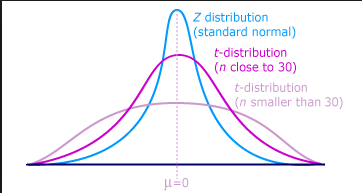

[Explicacion de las distribuciones Z y T](https://medium.com/statistical-guess/t-interval-t-statistics-f45590e1367d)

Calculamos el intervalo de confianza del 95% para la media de la estatura de la población.

La función stats.sem es utilizada para calcular el error estándar de la media de los datos ingresados.

In [ ]:
stats.t

In [ ]:
stats.t.interval(alpha = 0.95,
                 df = len(data1)-1,
                 loc = np.mean(data1),
                 scale = stats.sem(data1),
                 )

(16.75776979778498, 24.042230202215016)

In [ ]:
np.mean(data1)

20.4

Calculamos el intervalor de confianza (CI) 99% para la misma muestra

In [ ]:
stats.t.interval(alpha = 0.99,
                 df = len(data1)-1,
                 loc = np.mean(data1),
                 scale = stats.sem(data1),
                 )

(15.3447902793728, 25.455209720627195)

In [ ]:
stats.t.interval(alpha = 0.95,
                 df = len(data2)-1,
                 loc = np.mean(data2),
                 scale = stats.sem(data2),
                 )

(17.153789840921917, 24.312876825744752)

In [ ]:
stats.t.interval(alpha = 0.99,
                 df = len(data2)-1,
                 loc = np.mean(data2),
                 scale = stats.sem(data2),
                 )

(15.765129223872773, 25.701537442793896)

### Intervalos de confianza en una distribución normal

Definimos otros datos de prueba

In [ ]:
np.random.seed(42)
data = np.random.randint(10,30,50)
data

array([16, 29, 24, 20, 17, 16, 28, 20, 20, 13, 17, 12, 11, 21, 15, 11, 10,
       21, 21, 26, 19, 25, 24, 24, 28, 21, 29, 12, 14, 28, 16, 18, 16, 27,
       13, 23, 27, 18, 11, 29, 24, 16, 21, 17, 24, 12, 23, 26, 13, 27])

Calculamos el intervalo de confianza del 95% para la media de la población.


La función stats.sem es utilizada para calcular el error estándar de la media de los datos ingresados.

In [ ]:
stats.norm

In [ ]:
stats.norm.interval(
    alpha = 0.95,
    loc = np.mean(data),
    scale = stats.sem(data)
)

(18.25642372955045, 21.46357627044955)

Calculamos el intervalor de confianza 99% para la misma muestra.

In [ ]:
stats.norm.interval(
    alpha = 0.99,
    loc = np.mean(data),
    scale = stats.sem(data)
)

(17.752543546472907, 21.96745645352709)

# Métricas sobre distribuciones

## Distribuciones

Una de las mejores maneras de describir una variable es reportar los valores que aparecen en el dataset relacionados con dicha viariable y la cantida de veces que aparece cada uno. A este tipo de descripción la llamamos **distribución** de una variable.

La forma más común de representar a una distribución es mediante un histograma, la cual es una gráfica que muestra la frecuencia de cada valor de la variable.

In [ ]:
iris = sns.load_dataset ("iris")

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


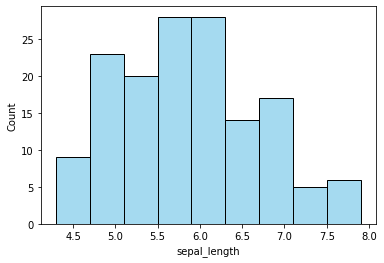

In [ ]:
sns.histplot(iris["sepal_length"], color = "skyblue")

También puedes utilizar simplemente un contador para obtener las frecuencias de los valores en un diccionario donde cada clave es un valor de la variable y cada valor es la frecuencia

In [ ]:
Counter

Si cuentas con pandas instalado, puedes contabilizarlos con el método value_counts() 👍

In [ ]:
iris["sepall_length"].value_counts()

KeyError: ignored

## Percentiles

Los percentiles son una forma de obtener el valor que corresponde a un cierto porcentaje de los datos ordenados en una distribución, de tal manera que no importa si la distribución es asimétrica, el percentil nos permite hacer el "corte" en la posición porcentual que requerimos.

La mediana, puede considerarse un "nombre especial" para el percentil 50, esto significa que el valor de la mediante siempre es mayor que el 50% de los datos ordenados.

Lo mismo se puede decir de cualquier otro percentil, es decir, si calculas el percentil 25, eso quiere decir que acabas de encontrar un valor en los datos que es mayor que el 25% de los datos ordenados.

In [ ]:
percentiles = np.array([25, 50 ,75])


Obtenemos los datos para la distribución

In [ ]:
versicolor_petal_length = iris.query('species == "versicolor"').loc[:, 'petal_length']
versicolor_petal_length

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

Calculamos los percentiles: ptiles_vers

In [ ]:
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
ptiles_vers  #el valor de en medio esta asociada a la media

array([4.  , 4.35, 4.6 ])

In [ ]:
np.mean(versicolor_petal_length)

4.26

### Visualizando percentiles mediante histograma

In [ ]:
nombres = ('percentil 25', 'percentil 50', 'percentil 75')
colores = ('green', 'red', 'blue')

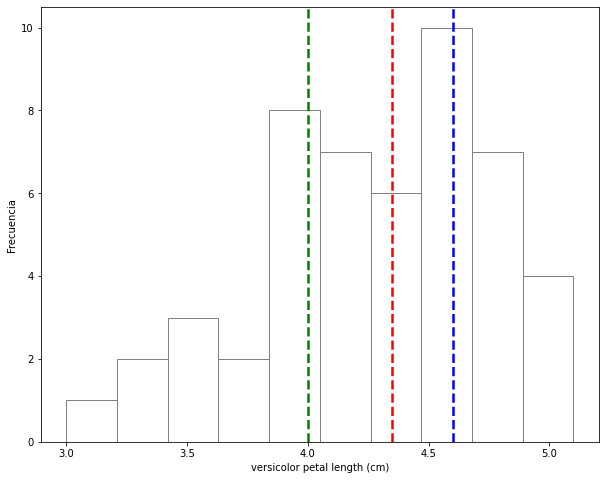

In [ ]:
_ = versicolor_petal_length.plot (
    kind = 'hist',
    figsize = (10,8),
    color ='white',
    edgecolor = 'gray',
)
_ = plt.xlabel('versicolor petal length (cm)')
_ = plt.ylabel('Frecuencia')

for measurement, nombre, color in zip (ptiles_vers , nombres, colores):
  plt.axvline(x = measurement, linestyle = '--', linewidth = 2.5, label = '{0} at {1}'.format(nombre,measurement), c= color)

Vamos a corroborar con un boxplot

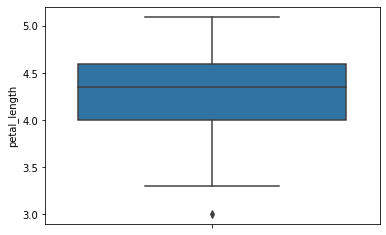

In [ ]:
sns.boxplot (y = versicolor_petal_length)

## Outliers (valores atípicos)

Cuando miramos un histograma es muy fácil identificar los valores más comunes en la distribución, pero los outliers no siempre quedan a la vista.

Antes de continuar, siempre es buena idea revisar si tenemos valores atípicos, los cuales son valores extremos que bien pueden ser errores en los registros, o quizá sean reportes precisos de eventos atípicos.

Podemos identificar outliers muy fácilmente con gráficas de caja

La mejor manera de darle manejo a los datos atípicos

### Hallar outliers con boxplots

In [ ]:
my_pal = {
    "versicolor" : "g",
    "setosa" : "b",
    "virginica": "o"
}
my_pal

{'versicolor': 'g', 'setosa': 'b', 'virginica': 'o'}

In [ ]:
sns.boxplot(x = iris["species"], y = iris["sepal_length"], palette = my_pal)

ValueError: ignored

### Hallar outliers con z-score

Se obtiene la media y la desviación estandar.

In [ ]:
data = iris.query('species == "virginia"').loc[:, 'sepal_length']
mean = np.mean(data)
std = np.std(data)

In [ ]:
mean

nan

In [ ]:
std

nan

Z standarization es para normalizar los datos para poder definir si sobrepasan o no un umbral ( tambien se pueden usar para comparar variables X con Y)

In [ ]:
threshold = 2.0
outlier = []

In [ ]:
for i in data:
  z = (i - mean)/ std
  if z > threshold or z < -threshold:
    outlier.append(i)
    outlier

# Pruebas de hipótesis

## Prueba de hipótesis para una muestra

Esta es la prueba de hipótesis más básica. La mayoría de las veces no tenemos un valor fijo específico para comparar. Pero si es así, esta es la prueba de hipótesis más simple. Voy a comenzar con una prueba de hipótesis de una proporción. Usé el conjunto de datos Heart de Kaggle para esta demostración. No dude en descargar el conjunto de datos para su práctica. Aquí importo los paquetes y el conjunto de datos:

https://www.kaggle.com/johnsmith88/heart-disease-dataset


https://www.kaggle.com/ronitf/heart-disease-uci

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/copia de heart.csv')

FileNotFoundError: ignored

La última columna del conjunto de datos es "target". Que nos dice si la persona tiene una enfermedad cardíaca.

La pregunta de investigación para esta sección es: “La proporción de la población de Irlanda que padece una enfermedad cardíaca es del 42%. ¿Hay más personas que padecen enfermedades cardíacas en los EE. UU. ”?

Vamos a intentar corroborar esta hipótesis paso por paso:

### Paso 1: Determinar la hipótesis nula y las hipótesis alternativas

En este problema, la hipótesis nula es que la proporción de la población que padece una enfermedad cardíaca en los EE. UU. sea menor o igual al 42%. Pero si probamos que sea igual, con eso tendremos para corroborar la hipótesis.

Por lo tanto, podemos definir p0 como:

`
H0 = 0.42  # Hipótesis nula
`
`H1 > 0.42  # Hipótesis alternativa
`

Veamos si podemos hallar evidencia para refutar la hipótesis nula

### Paso 2: Calcular la proporción de la población que tiene una enfermedad cardiovascular

Asuma que el dataset de más arriba es una muestra representativa de la población de Estados Unidos. Entonces, vamos a **calcular la proporción** de personas que de hecho tienen una enfermedad cardiovascular.

In [ ]:
p_us = len(df [df['target']])/len(df)
p_us

NameError: ignored

La **proporción de la población** de la muestra que **tiene enfermedad cardíaca** es 0,51 o **51%**. Este porcentaje es **mayor** que la **hipótesis nula**. Eso es 42%

Pero la pregunta es si es significativamente más del 42%. Si tomamos una muestra aleatoria simple diferente, la proporción de población observada actualmente (51%) puede ser diferente.

Para averiguar si la proporción de población observada es significativamente mayor que la hipótesis nula, realice una prueba de hipótesis.

### Paso 3: Calculando el test estadístico

Esta es la fórmula para el test estadístico

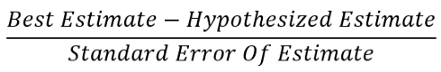


Utilizaremos esta fórmula para el error estándar

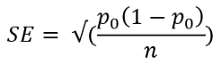

En esta fórmula, `p0` es 0,42 (según la hipótesis nula) y `n` es el tamaño de la población de la muestra. Ahora calcule el **error estándar** y las estadísticas de la prueba:

In [ ]:
se = np.sqrt(0.42*  (1-0.42) / len(df))
se

NameError: ignored

Encuentre las **estadísticas de prueba** utilizando la fórmula para la estadística de prueba anterior:

In [ ]:
be = p_us
he = 0.42

test_stat = (be-he) / se
test_stat

NameError: ignored

### Paso 4: Calcule el valor p

Esta estadística de prueba también se llama puntuación z. Puede encontrar el valor p de una z_table o puede encontrar el valor p de esta fórmula en Python.

### Paso 5: inferir la conclusión del valor p

Considere que el nivel de significancia alfa es 5% o 0.05. Un nivel de significancia del 5% o menos significa que existe una probabilidad del 95% o más de que los resultados no sean aleatorios.

Aquí el valor p es menor que nuestro nivel de significancia considerado 0.05. Entonces, podemos rechazar la hipótesis nula. Eso significa que sí hay una diferencia significativa en la proporción de la población que padece una enfermedad cardíaca en EE.UU con respecto de Irlanda.

## Pruebas de hipótesis para dos diferentes muestras

Las pruebas comparativas se realizan con mucha más frecuencia que una prueba de hipótesis de una sola muestra de la población.

Se realiza una prueba de proporciones de dos muestras para evaluar si la proporción poblacional de algunos rasgos difiere entre dos subgrupos.

### Paso 1: Determinar la hipótesis nula, la hipótesis alternativa y el nivel significativo (alfa)

Aquí, queremos comprobar si existe alguna diferencia entre la proporción de la población de hombres y mujeres que padecen enfermedades cardíacas. Comenzaremos con el supuesto de que no hay diferencia.

`H0: p1 - p2 = 0  # Hipótesis nula`

Esta es nuestra hipótesis nula. Aquí, p1 es la proporción de la población de mujeres con enfermedades cardíacas y p2 es la proporción de la población de hombres que tienen una enfermedad cardíaca.

¿Cuál podría ser la hipótesis alternativa?

La hipótesis alternativa puede ser, hay una diferencia.

`H1: p1 - p2 != 0  # Hipótesis alternativa`

Usemos el nivel de significancia de 0.1 o 10%.

### Paso 2: Generar una visualización que muestre la proporción de la población de hombres y mujeres con enfermedades cardíacas y la población total de hombres y mujeres.

### Paso 3: Calcule la estadística de prueba

Usaremos la misma fórmula para la prueba estadística de antes. La mejor estimación es p1 - p2. Aquí, p1 es la proporción poblacional de mujeres con enfermedades cardíacas y p2 es la proporción poblacional de hombres con enfermedades cardíacas.

El error estándar para la proporción de dos poblaciones se calcula con la siguiente fórmula:

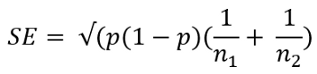

Aquí, p es la proporción de la población total en la muestra con enfermedad cardíaca. n1 y n2 son los números totales de las poblaciones femenina y masculina de la muestra.

Ahora, use este error estándar y calcule la estadística de prueba.

El test_statistic calculado es 8.9483. Eso significa que la diferencia observada en las proporciones de la muestra es 8.948 error estándar estimado por encima del valor hipotetizado.

### Paso 4: Calcule el valor p

EL valor de p es tremendamente chico. Eso significa que es muy poco probable que los resultados que observemos sean verdaderos considerando que la hipótesis nula es verdadera.

Por otro lado, el valor p no es mayor que el nivel de significancia (0.1). Entonces, tenemos suficiente evidencia para rechazar la hipótesis nula.

La proporción de la población de hombres con enfermedades del corazón es significativamente diferente de la proporción de la población de mujeres con enfermedades del corazón.